# recursive quicksort

sort an array by choosing a point in the array, called the pivot point, then creating two smaller arrays:
Keep in mind an array of size one is already sorted, so no need to sort that.

- choose a point, called the pivot point
- make an array containing everything smaller or equal to the pivot
- second array containing everything bigger than the pivot
- so the answer is just quicksort(smaller_array) + pivot + quicksort(bigger_array)

first to generate some random data:

In [94]:
import random

random_data = [random.randint(0,100) for i in range(10)]
random_data[:10]

[85, 36, 47, 30, 4, 11, 27, 9, 12, 51]

In [95]:
def quicksort(data):
    if len(data) < 2:
        return data
    else:   
        pivot = data[0]
        less = [i for i in data[1:] if i <= pivot]
        more = [i for i in data[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(more)

quicksort(random_data)

[4, 9, 11, 12, 27, 30, 36, 47, 51, 85]

# using a random pivot

Quicksort works faster when using a random pivot

In [143]:
def quicksort2(data):
    import random
    if len(data) < 2:
        return data
    else:
        p_idx = random.randrange(0,len(data)-1)
        pivot = data[p_idx]
        
        less = [i for i in data[:p_idx] if i <= pivot] + [i for i in data[p_idx+1:] if i <= pivot]
        more = [i for i in data[:p_idx] if i > pivot] + [i for i in data[p_idx+1:] if i > pivot]
        return quicksort2(less) + [pivot] + quicksort2(more)

quicksort2(random_data)

[4, 9, 11, 12, 27, 30, 36, 47, 51, 85]

## some tests to make sure the algos are working correctly

In [107]:
assert len(random_data) == len(quicksort(random_data))
assert quicksort(random_data) == quicksort2(random_data) == sorted(random_data)

In [112]:
%timeit(quicksort(random_data))

19.1 µs ± 639 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [113]:
%timeit(quicksort2(random_data))

41.9 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## visualizing quicksort

there are many 

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def quicksort_onestep(data):
    import random
    if len(data) < 2:
        return data
    else:
        p_idx = random.randrange(0,len(data)-1)
        pivot = data[p_idx]
        
        less = [i for i in data[:p_idx] if i <= pivot] + [i for i in data[p_idx+1:] if i <= pivot]
        more = [i for i in data[:p_idx] if i > pivot] + [i for i in data[p_idx+1:] if i > pivot]
        return less + [pivot] + more

quicksort_onestep(random_data)

[36, 30, 4, 11, 27, 9, 12, 47, 85, 51]

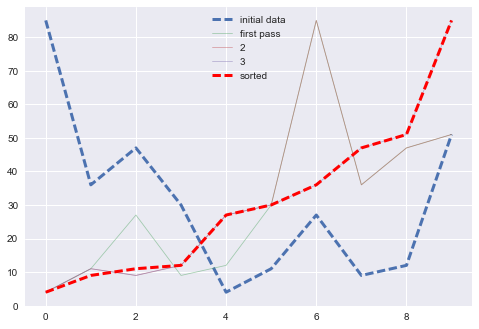

In [200]:
def compare_lists(a, b):
    assert len(a) == len(b)
    for pair in zip(a, b):
        if pair[0] != pair[1]:
            return False
    return True

sorted_data = quicksort2(random_data)
plt.plot(random_data, label="initial data", lw=3, ls="dashed")

# first quicksort step
d = quicksort_onestep(random_data)
plt.plot(d, alpha=0.5, lw=0.8, label="first pass")

#rest of quicksort steps
q_pass = 1
while not (compare_lists(sorted_data, d)):
    q_pass += 1
    d = quicksort_onestep(d)
    if compare_lists(d, sorted_data):
        plt.plot(sorted_data, c="r", ls="dashed", lw=3, label="sorted")
    else:
        plt.plot(d, alpha=0.5, lw=0.8, label=q_pass)

plt.legend()